# Optional Lab: Logistic Regression

In this ungraded lab, you will 
- explore the sigmoid function (also known as the logistic function)
- explore logistic regression; which uses the sigmoid function

In [24]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
from files.plt_one_addpt_onclick import plt_one_addpt_onclick
from files.lab_utils_common import draw_vthresh
# plt.style.use('./files.deeplearning.mplstyle')

ModuleNotFoundError: No module named 'lab_utils_common'

## Sigmoid or Logistic Function
<img align="left" src="./files/images/C1_W3_LogisticRegression_left.png"     style=" width:300px; padding: 10px; " >As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.



NumPy has a function called exp(), which offers a convenient way to calculate the exponential (  𝑒𝑧
 ) of all elements in the input array (z).

It also works with a single number as an input, as shown below.

In [15]:
# input is an array
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


In [20]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Args:
        z (ndarray): A scalar, numpy array of any size.
    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """
    g = 1 / ( 1 + np.exp(-z))
    return g

Let's see what the output of this function is for various value of z

In [21]:
#  Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10, 11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])


Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


[]

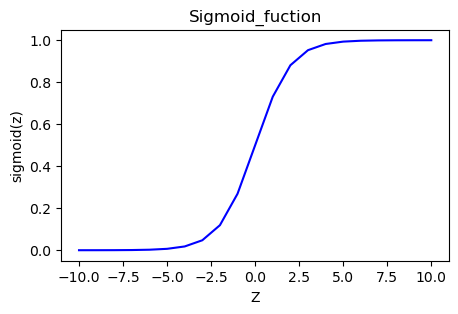

In [22]:
# PLot Z vs sigmoid(z)
fig,ax = plt.subplots(1,1, figsize=(5,3))

ax.plot(z_tmp, y, c='b')
ax.set_title('Sigmoid_fuction')
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('Z')
ax.plot()

As you can see, the sigmoid function approaches 0 as z goes to large negative values and approaches 1 as z goes to large positive values.

## Logistic Regression
<img align="left" src="./files/images/C1_W3_LogisticRegression_right.png"     style=" width:300px; padding: 10px; " > A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$